In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Load data from each month
july_data = pd.read_excel('brand_Q3_sales.xlsx', sheet_name='July')
august_data = pd.read_excel('brand_Q3_sales.xlsx', sheet_name='August')
september_data = pd.read_excel('brand_Q3_sales.xlsx', sheet_name='September')

In [3]:
july_data.head(15)

,Date,Product,Amazon Unit Sold,Myntra Unit Sold,Website Unit Sold,Price per Unit,Amazon Sales,Amazon Profit,Myntra Sales,Myntra Profit,Website Sales,Website Profit,Total Units Sold,Total Sales,Total Profit
0,2024-07-01,Pinnacle Jacket,23,44,27,1799,41377,7240.975,79156,11873.40,48573,9714.6,94,169106,28828.975
1,2024-07-01,Varsity Jacket,13,34,17,2199,28587,5002.725,74766,11214.90,37383,7476.6,64,140736,23694.225
2,2024-07-01,Solid Jacket,8,29,12,1199,9592,1678.600,34771,5215.65,14388,2877.6,49,58751,9771.850
3,2024-07-01,Geometric Jacket,10,31,14,1499,14990,2623.250,46469,6970.35,20986,4197.2,55,82445,13790.800
4,2024-07-01,Textured Hoodie,34,55,38,1499,50966,8919.050,82445,12366.75,56962,11392.4,127,190373,32678.200
5,2024-07-01,Graphics Hoodie,22,43,26,1999,43978,7696.150,85957,12893.55,51974,10394.8,91,181909,30984.500
6,2024-07-01,Textured Sweatshirt,26,47,30,999,25974,4545.450,46953,7042.95,29970,5994.0,103,102897,17582.400
7,2024-07-01,Graphics Sweatshirt,19,40,23,1199,22781,3986.675,47960,7194.00,27577,5515.4,82,98318,16696.075
8,2024-07-01,J Series Sweater,9,30,13,999,8991,1573.425,29970,4495.50,12987,2597.4,52,51948,8666.325
9,2024-07-01,K Series Sweater,15,36,19,1399,20985,3672.375,50364,7554.60,26581,5316.2,70,97930,16543.175


In [4]:
august_data.head(15)

,Date,Product,Amazon Unit Sold,Myntra Unit Sold,Website Unit Sold,Price per Unit,Amazon Sales,Amazon Profit,Myntra Sales,Myntra Profit,Website Sales,Website Profit,Total Units Sold,Total Sales,Total Profit
0,2024-08-01,Pinnacle Jacket,27,47,44,1799,48573,8500.275,84553,12682.95,79156,15831.2,118,212282,37014.425
1,2024-08-01,Varsity Jacket,17,37,34,2199,37383,6542.025,81363,12204.45,74766,14953.2,88,193512,33699.675
2,2024-08-01,Solid Jacket,12,32,29,1199,14388,2517.900,38368,5755.20,34771,6954.2,73,87527,15227.300
3,2024-08-01,Geometric Jacket,14,34,31,1499,20986,3672.550,50966,7644.90,46469,9293.8,79,118421,20611.250
4,2024-08-01,Textured Hoodie,38,58,55,1499,56962,9968.350,86942,13041.30,82445,16489.0,151,226349,39498.650
5,2024-08-01,Graphics Hoodie,26,46,43,1999,51974,9095.450,91954,13793.10,85957,17191.4,115,229885,40079.950
6,2024-08-01,Textured Sweatshirt,30,50,47,999,29970,5244.750,49950,7492.50,46953,9390.6,127,126873,22127.850
7,2024-08-01,Graphics Sweatshirt,23,43,40,1199,27577,4825.975,51557,7733.55,47960,9592.0,106,127094,22151.525
8,2024-08-01,J Series Sweater,13,33,30,999,12987,2272.725,32967,4945.05,29970,5994.0,76,75924,13211.775
9,2024-08-01,K Series Sweater,19,39,36,1399,26581,4651.675,54561,8184.15,50364,10072.8,94,131506,22908.625


In [5]:
september_data.head(15)

,Date,Product,Amazon Unit Sold,Myntra Unit Sold,Website Unit Sold,Price per Unit,Amazon Sales,Amazon Profit,Myntra Sales,Myntra Profit,Website Sales,Website Profit,Total Units Sold,Total Sales,Total Profit
0,2024-09-01,Pinnacle Jacket,44,52,47,1799,79156,13852.300,93548,14032.20,84553,16910.6,143,257257,44795.100
1,2024-09-01,Varsity Jacket,34,42,37,2199,74766,13084.050,92358,13853.70,81363,16272.6,113,248487,43210.350
2,2024-09-01,Solid Jacket,29,37,32,1199,34771,6084.925,44363,6654.45,38368,7673.6,98,117502,20412.975
3,2024-09-01,Geometric Jacket,31,39,34,1499,46469,8132.075,58461,8769.15,50966,10193.2,104,155896,27094.425
4,2024-09-01,Textured Hoodie,55,63,58,1499,82445,14427.875,94437,14165.55,86942,17388.4,176,263824,45981.825
5,2024-09-01,Graphics Hoodie,43,51,46,1999,85957,15042.475,101949,15292.35,91954,18390.8,140,279860,48725.625
6,2024-09-01,Textured Sweatshirt,47,55,50,999,46953,8216.775,54945,8241.75,49950,9990.0,152,151848,26448.525
7,2024-09-01,Graphics Sweatshirt,40,48,43,1199,47960,8393.000,57552,8632.80,51557,10311.4,131,157069,27337.200
8,2024-09-01,J Series Sweater,30,38,33,999,29970,5244.750,37962,5694.30,32967,6593.4,101,100899,17532.450
9,2024-09-01,K Series Sweater,36,44,39,1399,50364,8813.700,61556,9233.40,54561,10912.2,119,166481,28959.300


In [10]:
# Check for missing values in the July sheet
print(july_data.isnull().sum())

       Date          0
     Product         0
Amazon Unit Sold     0
Myntra Unit Sold     0
Website Unit Sold    0
Price per Unit       0
Amazon Sales         0
Amazon Profit        0
Myntra Sales         0
Myntra Profit        0
Website Sales        0
Website Profit       0
Total Units Sold     0
Total Sales          0
Total Profit         0
dtype: int64


In [11]:
# Check for missing values in the August sheet
print(august_data.isnull().sum())

       Date          0
     Product         0
Amazon Unit Sold     0
Myntra Unit Sold     0
Website Unit Sold    0
Price per Unit       0
Amazon Sales         0
Amazon Profit        0
Myntra Sales         0
Myntra Profit        0
Website Sales        0
Website Profit       0
Total Units Sold     0
Total Sales          0
Total Profit         0
dtype: int64


In [12]:
# Check for missing values in the September sheet
print(september_data.isnull().sum())

       Date          0
     Product         0
Amazon Unit Sold     0
Myntra Unit Sold     0
Website Unit Sold    0
Price per Unit       0
Amazon Sales         0
Amazon Profit        0
Myntra Sales         0
Myntra Profit        0
Website Sales        0
Website Profit       0
Total Units Sold     0
Total Sales          0
Total Profit         0
dtype: int64


In [13]:
# Add a 'Month' column to identify data from different months
july_data['Month'] = 'July'
august_data['Month'] = 'August'
september_data['Month'] = 'September'

# Merge the data
q3_data = pd.concat([july_data, august_data, september_data], ignore_index=True)

# Preview the merged dataset
print(q3_data.head())

         Date                     Product  Amazon Unit Sold  Myntra Unit Sold  \
0  2024-07-01             Pinnacle Jacket                23                44   
1  2024-07-01              Varsity Jacket                13                34   
2  2024-07-01                Solid Jacket                 8                29   
3  2024-07-01            Geometric Jacket                10                31   
4  2024-07-01             Textured Hoodie                34                55   

   Website Unit Sold  Price per Unit  Amazon Sales  Amazon Profit   \
0                 27            1799         41377        7240.975   
1                 17            2199         28587        5002.725   
2                 12            1199          9592        1678.600   
3                 14            1499         14990        2623.250   
4                 38            1499         50966        8919.050   

   Myntra Sales  Myntra Profit   Website Sales  Website Profit   \
0         79156        11

In [14]:
# Connect to a SQLite database (or any other database)
conn = sqlite3.connect('sales_performance.db')
cursor = conn.cursor()

# Create a table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales_data (
        Date TEXT,
        Product TEXT,
        Sales REAL,
        Month TEXT
    )
''')

# Insert data into the table
q3_data.to_sql('sales_data', conn, if_exists='replace', index=False)

1380

In [21]:
# SQL query: Total sales per month
query = '''
    SELECT Month, SUM([Total Sales]) as Total_Sales
    FROM sales_data
    GROUP BY Month
    ORDER BY 
        CASE 
            WHEN Month = 'July' THEN 1
            WHEN Month = 'August' THEN 2
            WHEN Month = 'September' THEN 3
        END
'''

total_sales_per_month = pd.read_sql(query, conn)
print(total_sales_per_month)

       Month  Total_Sales
0       July     64542870
1     August     80156494
2  September     92042268


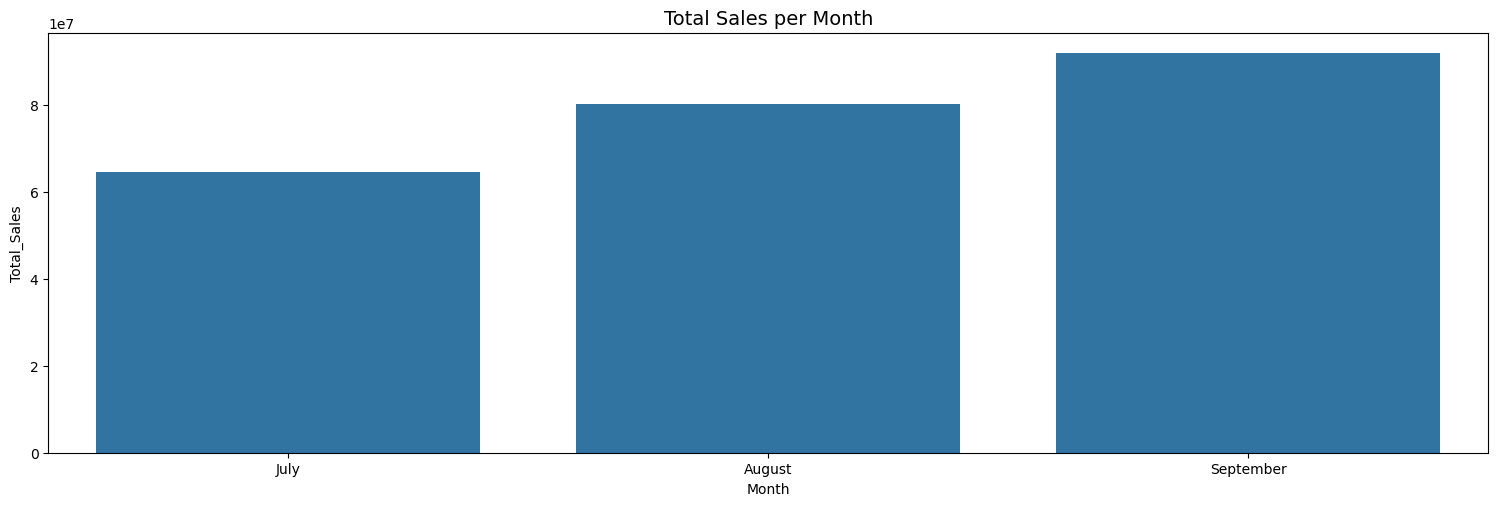

In [33]:
# Plot total sales per month
fig, ax = plt.subplots(figsize=(8, 6))  
sns.barplot(x='Month', y='Total_Sales', data=total_sales_per_month, ax=ax)
ax.set_title('Total Sales per Month', fontsize=14)
plt.subplots_adjust(left=0.2, right=2, top=0.9, bottom=0.2)  # Adjust the values if needed
plt.show()

In [53]:
# SQL query: Total profit per month
query = '''
    SELECT Month, SUM([Total Profit]) as Total_Profit
    FROM sales_data
    GROUP BY Month
    ORDER BY 
        CASE 
            WHEN Month = 'July' THEN 1
            WHEN Month = 'August' THEN 2
            WHEN Month = 'September' THEN 3
        END
'''

total_profit_per_month = pd.read_sql(query, conn)
print(total_profit_per_month)

       Month  Total_Profit
0       July  1.106128e+07
1     August  1.397511e+07
2  September  1.602308e+07


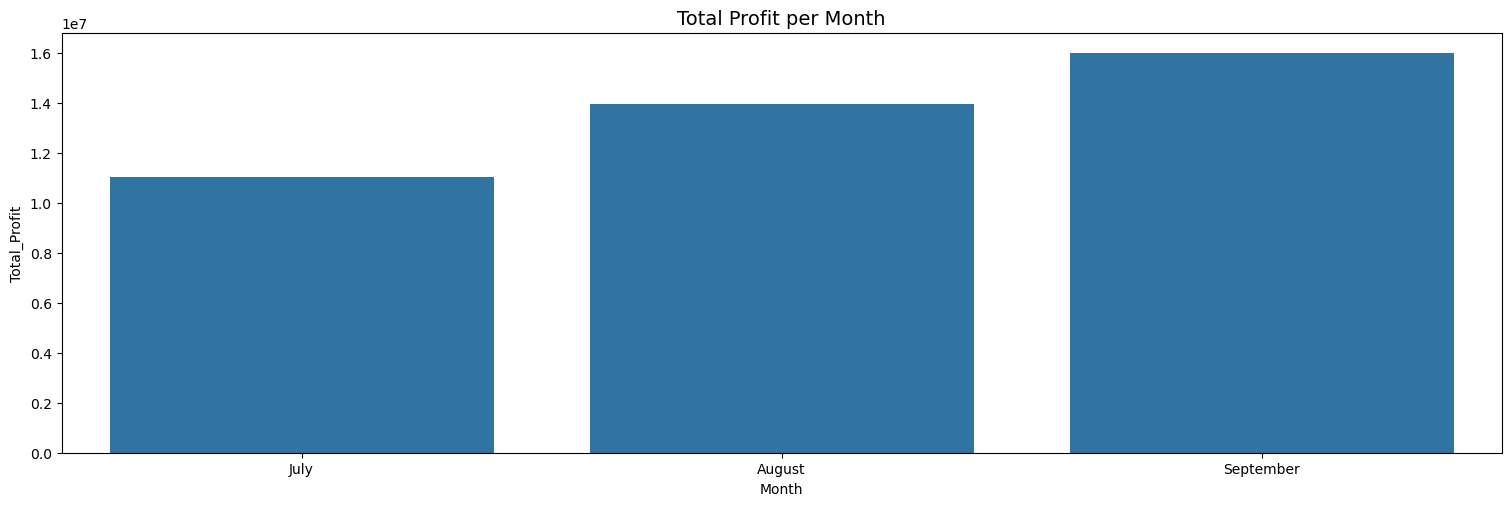

In [54]:
# Plot total sales per month
fig, ax = plt.subplots(figsize=(8, 6))  
sns.barplot(x='Month', y='Total_Profit', data=total_profit_per_month, ax=ax)
ax.set_title('Total Profit per Month', fontsize=14)
plt.subplots_adjust(left=0.2, right=2, top=0.9, bottom=0.2)  # Adjust the values if needed
plt.show()

In [49]:
query_products_sales = '''
    SELECT [     Product], SUM([Total Sales]) as Total_Sales
    FROM sales_data
    GROUP BY [     Product]
    ORDER BY Total_Sales DESC
    LIMIT 15
'''

products_sales = pd.read_sql(query_products_sales, conn)
print(products_sales)

                          Product  Total_Sales
0                 Graphics Hoodie     22268860
1                        RF Jeans     22267674
2                 Pinnacle Jacket     21382914
3                 Textured Hoodie     21258818
4                  Varsity Jacket     20463894
5                        SF Jeans     16264150
6                L Series Sweater     15396338
7                        LF Jeans     13928402
8                K Series Sweater     13892070
9             Graphics Sweatshirt     13618242
10               Geometric Jacket     13092266
11                    Cargo Pants     12956394
12            Textured Sweatshirt     12005982
13                   Solid Jacket      9532050
14               J Series Sweater      8413578


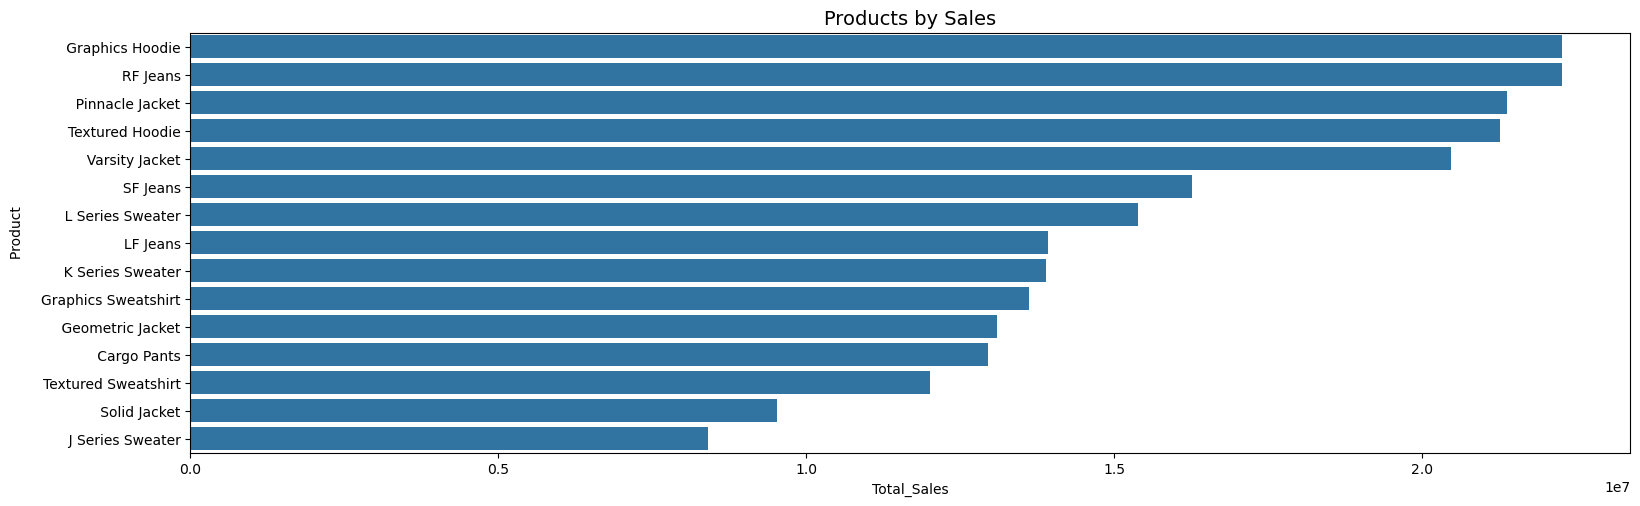

In [51]:
# Plot product sales
fig, ax = plt.subplots(figsize=(8, 6))  
sns.barplot(x='Total_Sales', y='     Product', data=products_sales, ax=ax)
ax.set_title('Products by Sales', fontsize=14)
plt.subplots_adjust(left=0.2, right=2, top=0.9, bottom=0.2)  # Adjust the values if needed
plt.show()

In [55]:
query_products_profit = '''
    SELECT [     Product], SUM([Total Profit]) as Total_Profit
    FROM sales_data
    GROUP BY [     Product]
    ORDER BY Total_Profit DESC
    LIMIT 15
'''

products_profit = pd.read_sql(query_products_profit, conn)
print(products_profit)

                          Product  Total_Profit
0                        RF Jeans    3870539.40
1                 Graphics Hoodie    3863967.05
2                 Pinnacle Jacket    3712776.20
3                 Textured Hoodie    3695484.70
4                  Varsity Jacket    3544568.10
5                        SF Jeans    2820818.20
6                L Series Sweater    2666410.60
7                        LF Jeans    2409691.70
8                K Series Sweater    2408518.40
9             Graphics Sweatshirt    2363109.10
10               Geometric Jacket    2266637.90
11                    Cargo Pants    2247945.15
12            Textured Sweatshirt    2084813.10
13                   Solid Jacket    1648145.40
14               J Series Sweater    1456042.50


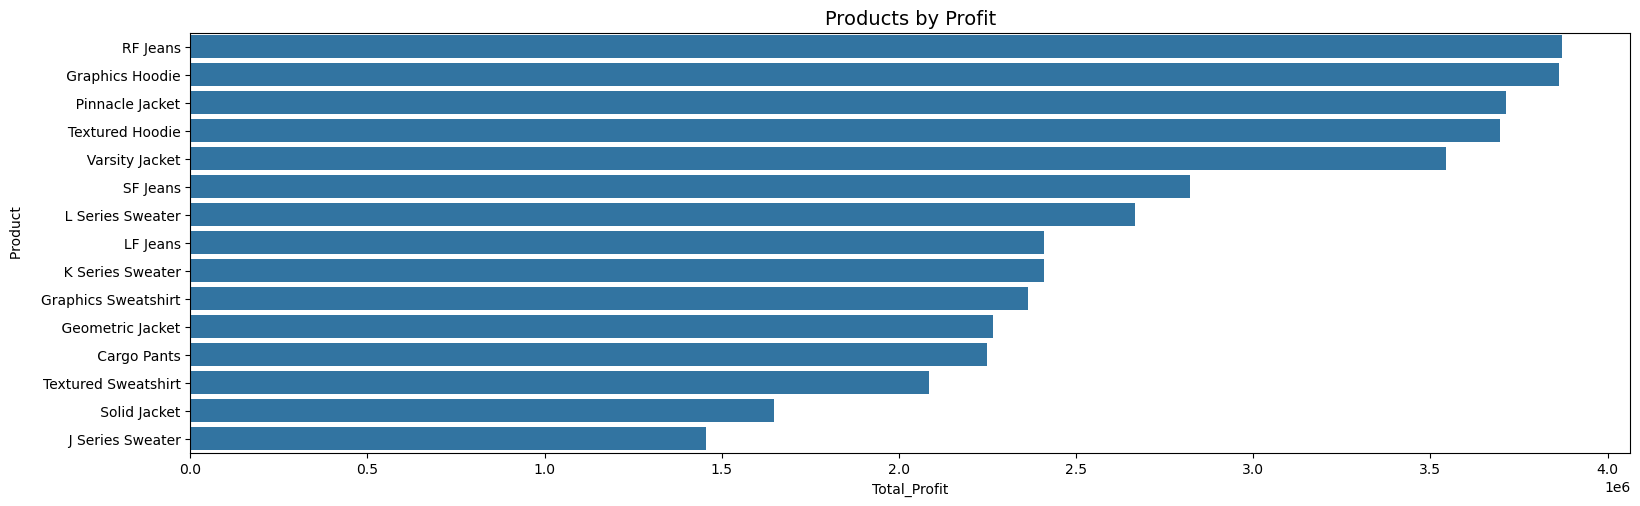

In [56]:
# Plot product sales
fig, ax = plt.subplots(figsize=(8, 6))  
sns.barplot(x='Total_Profit', y='     Product', data=products_profit, ax=ax)
ax.set_title('Products by Profit', fontsize=14)
plt.subplots_adjust(left=0.2, right=2, top=0.9, bottom=0.2)  # Adjust the values if needed
plt.show()

In [57]:
# Save cleaned data to CSV for Power BI import
q3_data.to_csv('cleaned_sales_data.csv', index=False)